In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Reading the vectors from the files
X = np.loadtxt("x.txt")
Y = np.loadtxt("y.txt")

# Adding 1 at the start of each vector from X
X = np.append(np.ones((X.shape[0], 1)), X, axis = 1)

# Splitting the data for train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

In [83]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [84]:
def error_function(predicted, actual):
    return(np.sum(((-1 * actual) * np.log(predicted)) - ((1 - actual) * np.log(1 - predicted))))

In [85]:
def cost_logistic(error, m):
    return((1 / m) * error)

In [86]:
def gradient_descent(X, Y, alpha, iterations):
    
    m = len(Y)
    
    # Create the zeros array for the thetas
    W = np.zeros(X.shape[1])
    
    # Array to store the costs
    costs = np.zeros(iterations)
    
    # Repeating the algorithm for i iterations
    for i in range(iterations):
        
        # Make predictions with the zeros array
        #predictions = sigmoid(np.dot(X, W.T))
        predictions = sigmoid(X.dot(W.T))
        
        # Get the error for those predictions
        error = error_function(predictions, Y)
        
        # Get the cost of those predictions
        cost = cost_logistic(error, m)
        costs[i] = cost
        
        # Gradient descent
        #grad = (1 / m) * np.dot(X.transpose(),(predictions - Y))
        #grad = (1 / m) * np.sum((X.dot(predictions - Y).T))
        grad = (1 / m) * ((predictions - Y).T.dot(X))
        
        # Refreshing the parameters
        W = W - (alpha * grad)
        
        if(i == iterations - 1):
            print(predictions.shape)
            print(grad.shape)

    return costs, W, predictions

In [100]:
# Hyperparameters for the algorithm
alpha = 0.000001
iterations = 1000

costs, W, predictions = gradient_descent(X_train, Y_train, alpha, iterations)

(1059,)
(3572,)


In [101]:
possible = list(sorted(set(predictions)))
print(possible)
threshold = possible[int(len(possible) / 2)]
print(threshold)

[0.4999337269718992, 0.49993431571126534, 0.4999344190575185, 0.4999344769176729, 0.4999345155942347, 0.49993453329889026, 0.4999345467159109, 0.4999345798866874, 0.49993459049323186, 0.4999346087719792, 0.4999346791158116, 0.49993475655773156, 0.4999347615330015, 0.4999348738703825, 0.4999350807659248, 0.49993510823753157, 0.4999351239545107, 0.4999351405062246, 0.4999351754762916, 0.4999351981778765, 0.49993522356548054, 0.4999352316155758, 0.4999352330779568, 0.4999352506768868, 0.4999352989751966, 0.4999353004873998, 0.49993530934865926, 0.499935346351272, 0.49993535474218126, 0.49993540169759626, 0.49993541134293734, 0.4999354153750952, 0.49993546388549803, 0.49993549089362843, 0.49993549345121263, 0.4999354945581976, 0.4999354984641074, 0.49993550502088124, 0.4999355073928602, 0.4999355107069154, 0.4999355174511497, 0.49993551779800804, 0.49993552627675414, 0.4999355379287829, 0.4999355416378292, 0.4999355481831912, 0.4999355482738995, 0.49993555311389165, 0.4999355616290114, 0.4

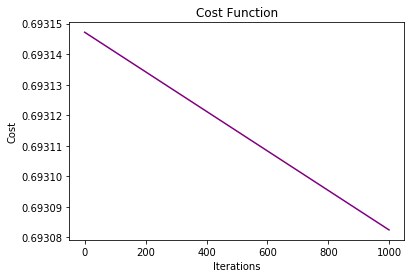

In [102]:
# Plotting the cost function versus the number of iterations
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(costs, color = 'purple')
plt.show()

In [103]:
# Calculating the precision, recall and F1 score
predictions_binary = predictions.copy()

for i in range(len(predictions)):
    if(predictions[i] <= threshold):
        predictions_binary[i] = 0
    
    else:
        predictions_binary[i] = 1

# Getting tp, fn, fp and tn
true_positives = 0
false_positives = 0

true_negatives = 0
false_negatives = 0

for i in range(len(predictions_binary)):
    if(predictions_binary[i] == 1 and Y_train[i] == 1):
        true_positives = true_positives + 1
    
    elif(predictions_binary[i] == 1 and Y_train[i] == 0):
        false_positives = false_positives + 1
    
    elif(predictions_binary[i] == 0 and Y_train[i] == 1):
        false_negatives = false_negatives + 1
    
    else:
        true_negatives = true_negatives + 1

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision: ", precision)
print("Recall   : ", recall)
print("F1 Score : ", f1, "\n")

print("True positives: ", true_positives)
print("True negatives: ", true_negatives, "\n")
print("False positives: ", false_positives)
print("False negatives: ", false_negatives)

Precision:  0.48880597014925375
Recall   :  1.0
F1 Score :  0.6566416040100251 

True positives:  262
True negatives:  523 

False positives:  274
False negatives:  0


[None, None, None, None]

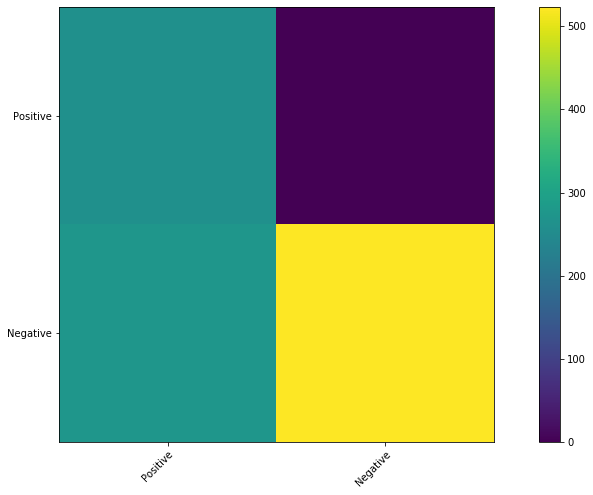

In [95]:
# Building the confusion matrix
confusion = np.array([[true_positives,  false_negatives],
                     [false_positives, true_negatives]])

fig, ax = plt.subplots(figsize = (16, 8))
im = ax.imshow(confusion)

# We want to show all ticks...
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))

# ... and label them with the respective list entries
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'])

plt.colorbar(im)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "right",
         rotation_mode = "anchor")